In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Global variables
separator = "_"*20
divider = "\n" + "*"*90 + "\n"

np.random.seed(42)

# Generate dataset
x, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=1, class_sep=2.0, random_state=42)

In [3]:
df = pd.DataFrame(x, columns=["Feature_1", "Feature_2"])

df["Target"] = y

In [4]:
# Introduce missing data explicitly
n_missing = 10 # 10% missing
missing_indices = np.random.choice(df.index, n_missing, replace=False)

In [5]:
df.loc[missing_indices, "Feature_1"] = np.nan
print(f"{separator} Dataset with missing values in Feature_1: {separator}")
print(df.loc[missing_indices]) # Show only rows with missing Feature_1
print(divider)
print(f"{separator} Count of missing values per column: {separator}")
print(df.isnull().sum())

____________________ Dataset with missing values in Feature_1: ____________________
    Feature_1  Feature_2  Target
83        NaN  -1.359041       0
53        NaN  -2.154699       0
70        NaN   1.656893       1
45        NaN   0.363953       1
44        NaN  -1.764086       0
39        NaN  -1.405301       0
22        NaN  -1.366994       0
80        NaN   1.692033       1
10        NaN  -2.233955       0
0         NaN  -1.757178       0

******************************************************************************************

____________________ Count of missing values per column: ____________________
Feature_1    10
Feature_2     0
Target        0
dtype: int64


In [6]:
# Treat missing values
df["Feature_1"] = df["Feature_1"].fillna(df["Feature_1"].mean())
# x = x.fillna(x.mean())
# df["Feature_1"].fillna(df["Feature_1"].mean(), inplace=True)

print(f"{separator} Count of missing values per column after treatment: {separator}")
print(df.isnull().sum())
print(divider)
print(f"{separator} Shape: {separator}")
print(df.shape)

____________________ Count of missing values per column after treatment: ____________________
Feature_1    0
Feature_2    0
Target       0
dtype: int64

******************************************************************************************

____________________ Shape: ____________________
(100, 3)


In [7]:
# Select Feature and Target
x = df[["Feature_1", "Feature_2"]]
y = df["Target"]

In [8]:
# Split the dataset into training and test data using train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [9]:
# Instantiate the SVM model with chosen kernel (e.g, liner RBF) and train it on the scaled training data
svm_model = SVC(kernel="linear", random_state=42)
svm_model.fit(x_train, y_train)

# Make predictions
y_pred = svm_model.predict(x_test)

In [10]:
 # Evaluate the Model
print("\n>> Accuracy:", accuracy_score(y_test, y_pred))
print(f"{divider}\n>> Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"{divider}\n>> Classification Report:\n", classification_report(y_test, y_pred))


>> Accuracy: 1.0

******************************************************************************************

>> Confusion Matrix:
 [[15  0]
 [ 0 15]]

******************************************************************************************

>> Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



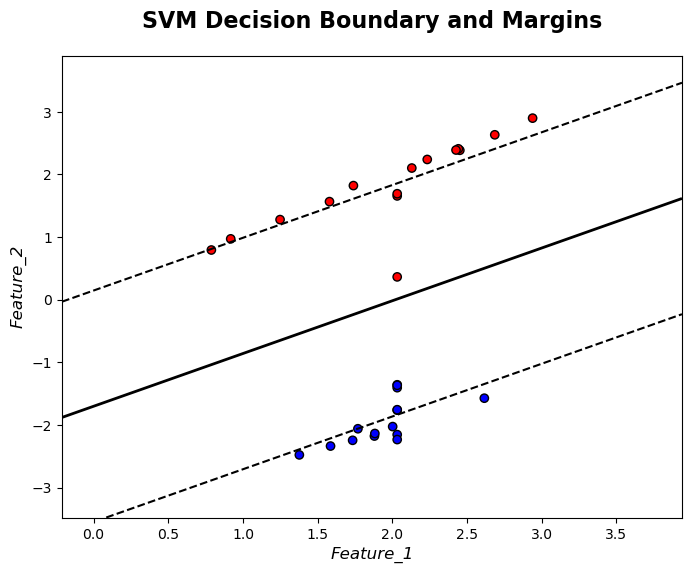

In [11]:
# Plotting Scatter and Plot
plt.figure(figsize = (8, 6))

# Scatter plot of test points colored by class
# plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test , cmap='bwr', edgecolors = 'k')
plt.scatter(x_test["Feature_1"], x_test["Feature_2"], c=y_test , cmap="bwr", edgecolors = 'k')

# Define grid boundaries based on test data
# x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
x_min, x_max = x_test["Feature_1"].min() - 1, x_test["Feature_1"].max() + 1
# y_min, y_max = x_test[:, 1].min() - 1, x_test[:, 1].max() + 1
y_min, y_max = x_test["Feature_2"].min() - 1, x_test["Feature_2"].max() + 1

xx , yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                      np.linspace(y_min, y_max, 500))

# Compute the decision function on the grid
# Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
grid = np.c_[xx.ravel(), yy.ravel()]
grid_df = pd.DataFrame(grid, columns=x_train.columns)

Z = svm_model.decision_function(grid_df).reshape(xx.shape)

# Plot decision boundary and margins
plt.contour(xx, yy, Z, levels = [0], colors = 'k', linewidths = 2) # Hyperplane
plt.contour(xx, yy, Z, levels = [-1, 1], colors = 'k', linestyles = "--") #  Margins (hard and soft margins)

plt.title("SVM Decision Boundary and Margins", fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Feature_1", fontsize=12, fontstyle="italic")
plt.ylabel("Feature_2", fontsize=12, fontstyle="italic")
plt.show()

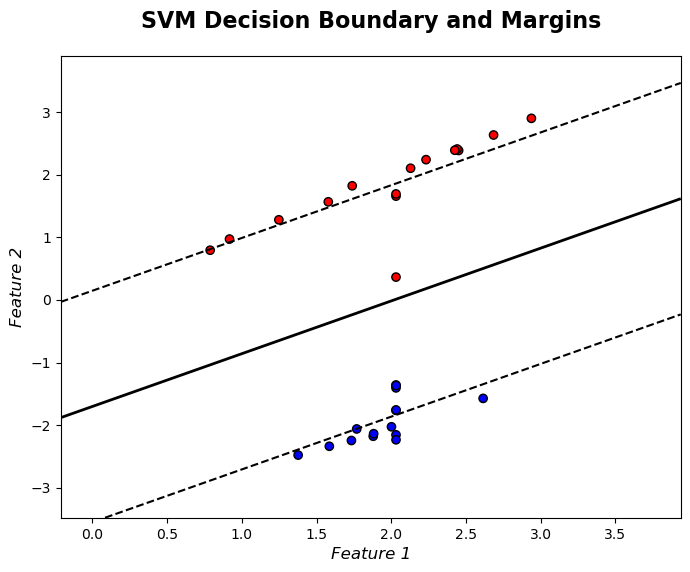

In [12]:
# Lecturers way of plotting....
plt.figure(figsize=(8, 6))

x_test = x_test.values

# Scatter plot of test points colored by class
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap="bwr", edgecolors='k')

# Define grid boundaries based on test data
x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
y_min, y_max = x_test[:, 1].min() - 1, x_test[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Compute decision function on the grid
# Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
grid = np.c_[xx.ravel(), yy.ravel()]
grid_df = pd.DataFrame(grid, columns=x_train.columns)

Z = svm_model.decision_function(grid_df).reshape(xx.shape)

# Plot decision boundary and margins
plt.contour(xx, yy, Z, levels=[0], colors='k', linewidths=2)         # Hyperplane
plt.contour(xx, yy, Z, levels=[-1, 1], colors='k', linestyles='--')  # Margins

plt.title("SVM Decision Boundary and Margins", fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Feature 1", fontsize=12, fontstyle="italic")
plt.ylabel("Feature 2", fontsize=12, fontstyle="italic")
plt.show()